# Исследование надёжности заёмщиков — анализ банковских данных

**Цель исследования** - определить степень влияния различных критериев на погашения заемщиками кредитных обязательств в установленный срок.

**Ход исследования:**

В ходе ислледования мы проверим следующие гипотезы:
 1. Существует ли зависимость между количеством детей и возвратом кредита в срок?
 2. Существует ли зависимость между семейным положением и возвратом кредита в срок?
 3. Существует ли зависимость между уровнем дохода и возвратом кредита в срок?
 4. Как разные цели кредита влияют на его возврат в срок?

Исследование пройдёт в три этапа:
 1. Обзор данных.
 2. Предобработка данных.
 3. Проверка гипотез.

## Обзор данных

Импортируем необходимые библиотеки.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Прочитаем имеющийся файл с данными.

In [2]:
# Чтение файла с сервера или с локального ПК
try:
    df = pd.read_csv('/datasets/data.csv')
except:
    df = pd.read_csv('D:\\Users\\BlackEdition\\Desktop\\Data Science\\Обучение в Яндекс\\'
                     '3. Предобработка данных\\Проект предобработка данных\\data.csv')

Выведем датасет и информацию о нем на экран.

In [3]:
df

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,-4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791.862382,операции с жильем
21521,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999.806512,сделка с автомобилем
21522,1,-2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672.561153,недвижимость
21523,3,-3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093.050500,на покупку своего автомобиля


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


**Выводы**

Из проведенного обзора данных можно сделать следующие выводы:
1. В таблице 12 колонок с данными разного типа.
2. Названия колонок таблицы имеют приемлемый формат и не требуют предварительной обработки.
3. Согласно документации данные имеют следующие назначения:
  * `children` — количество детей в семье;
  * `days_employed` — общий трудовой стаж в днях;
  * `dob_years` — возраст клиента в годах;
  * `education` — уровень образования клиента;
  * `education_id` — идентификатор уровня образования;
  * `family_status` — семейное положение;
  * `family_status_id` — идентификатор семейного положения;
  * `gender` — пол клиента;
  * `income_type` — тип занятости;
  * `debt` — имел ли задолженность по возврату кредитов;
  * `total_income` — ежемесячный доход;
  * `purpose` — цель получения кредита.
  
  Из обзора данных можно сделать вывод:
  
    * Типы представленных в таблице данных логически совпадают с их описанием и не требуют конвертации.
    * Данные в колонке `days_employed` (общий трудовой стаж в днях) имеют отрицательный формат.
    * Данные в колонке `ducation` (уровень образования клиента) имеют разный регистр написания символов.
    * Данные в колонке `purpose` (цель получения кредита) имеют неявные дубликаты.
    * Количество значений в колонках `days_employed` и `total_income` отличается, что свидетельствует о наличии пропущенных значений.

Устраним артефакты (выполним предобработку данных) для возможности проверки гипотез и обеспечения корректности проводимого анализа и результатов.

## Предобработка данных

### Заполнение пропусков

Проверим количество и долю NAN значений в данных:

In [5]:
df.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

In [6]:
# Проверка доли пропущенных значений по отношению к датасету
display(df['days_employed'].isna().mean())
display(df['total_income'].isna().mean())

0.10099883855981417

0.10099883855981417

Как видно из проведенного анализа пропущенных значений в колонке `total_income` находится 2174 значения NAN. Другие типы пропущенных значений в колонке отсутствуют.

Доли пропущенных значений в колонках `days_employed` и `total_income` равны.

Появление пропущенных значений в колонке `days_employed` возможно из-за отсутствия у заемщиков трудового стажа (в силу возраста или иных обстоятельств). Пропущенные значения в колонке `total_income`, вероятно, образованы из-за отказа заемщиков указывать свой доход или в связи с отсутствием подтверждающих доход документов.

Для исключения пропусков и корректности исследования определим медиану и заполним колонку `total_income` медианными значениями по категориям.

In [7]:
df['total_income'].median()

145017.93753253992

In [8]:
# Заполнение NAN медианой в разрезе категорий
df['total_income'] = df['total_income'].fillna(
    df.groupby('income_type')['total_income'].transform('median'))

In [9]:
display(df['days_employed'].isna().mean())
display(df['total_income'].isna().mean())
display(df['total_income'].median())

0.10099883855981417

0.0

142594.39684740017

Пропущенные значения заменены медианами. Медиана по столбцу `total_income` уменьшилась.

### Проверка данных на аномалии и исправления.

**Проверим все колонки данных на наличие аномалий, проанализировав уникальные значения по колонкам и их значения:**

In [10]:
# Вывод уникальных значения и их количества с целью анализа аномалий
try:
    for column in df:
        display(f'Уникальные значения в колонке: «{column}»')
        display(df[column].value_counts().sort_values(ascending=True))
        display()
except:
    display('Невозможно вывести значения')

'Уникальные значения в колонке: «children»'

 5         9
 4        41
-1        47
 20       76
 3       330
 2      2055
 1      4818
 0     14149
Name: children, dtype: int64

'Уникальные значения в колонке: «days_employed»'

-8437.673028      1
-926.185831       1
-2879.202052      1
-152.779569       1
-6929.865299      1
                 ..
-79.832064        1
-681.446439       1
-1556.249906      1
 363996.449108    1
-1984.507589      1
Name: days_employed, Length: 19351, dtype: int64

'Уникальные значения в колонке: «dob_years»'

75      1
74      6
73      8
19     14
72     33
20     51
71     58
70     65
69     85
68     99
0     101
21    111
67    167
66    183
22    183
65    194
23    254
24    264
64    265
63    269
62    352
61    355
25    357
60    377
26    408
55    443
59    444
51    448
53    459
57    460
58    461
46    475
54    479
47    480
52    484
56    487
27    493
45    497
28    503
49    508
32    510
43    513
50    514
37    537
48    538
30    540
29    545
44    547
36    555
31    560
39    573
33    581
42    597
38    598
34    603
41    607
40    609
35    617
Name: dob_years, dtype: int64

'Уникальные значения в колонке: «education»'

Ученая степень             1
УЧЕНАЯ СТЕПЕНЬ             1
ученая степень             4
Начальное                 15
НАЧАЛЬНОЕ                 17
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
Неоконченное высшее       47
начальное                250
Высшее                   268
ВЫСШЕЕ                   274
неоконченное высшее      668
Среднее                  711
СРЕДНЕЕ                  772
высшее                  4718
среднее                13750
Name: education, dtype: int64

'Уникальные значения в колонке: «education_id»'

4        6
3      282
2      744
0     5260
1    15233
Name: education_id, dtype: int64

'Уникальные значения в колонке: «family_status»'

вдовец / вдова             960
в разводе                 1195
Не женат / не замужем     2813
гражданский брак          4177
женат / замужем          12380
Name: family_status, dtype: int64

'Уникальные значения в колонке: «family_status_id»'

2      960
3     1195
4     2813
1     4177
0    12380
Name: family_status_id, dtype: int64

'Уникальные значения в колонке: «gender»'

XNA        1
M       7288
F      14236
Name: gender, dtype: int64

'Уникальные значения в колонке: «income_type»'

студент                1
в декрете              1
безработный            2
предприниматель        2
госслужащий         1459
пенсионер           3856
компаньон           5085
сотрудник          11119
Name: income_type, dtype: int64

'Уникальные значения в колонке: «debt»'

1     1741
0    19784
Name: debt, dtype: int64

'Уникальные значения в колонке: «total_income»'

190201.448274       1
135823.934197       1
95856.832424        1
144425.938277       1
113943.491460       1
                 ... 
499163.144947       2
150447.935283     147
118514.486412     414
172357.950966     509
142594.396847    1105
Name: total_income, Length: 19353, dtype: int64

'Уникальные значения в колонке: «purpose»'

заняться образованием                     412
получение высшего образования             426
профильное образование                    436
получение образования                     443
получение дополнительного образования     447
образование                               447
высшее образование                        453
сделка с автомобилем                      455
приобретение автомобиля                   462
дополнительное образование                462
на покупку автомобиля                     472
автомобили                                478
на покупку подержанного автомобиля        479
свой автомобиль                           480
сделка с подержанным автомобилем          489
автомобиль                                495
заняться высшим образованием              496
на покупку своего автомобиля              505
покупка жилой недвижимости                607
ремонт жилью                              612
строительство недвижимости                620
покупка своего жилья              

**Аномалии в колонке *`children`***

В колонке *children* имеется 2 артифакта:
1. Количество детей у некоторых заемщиков имеет отрицательное значение.
2. У некоторых заемщиков имеется 20 детей.

Отрицательное значение детей, скорее всего, является технической ошибкой в данных или человеческих фактором.
Наличие у заемщика 20-ти детей возможно не является ошибкой (возможно это многодетная семья).

Проверим количество вхождения в данных по таким артефактам для принятия решений.

In [11]:
# Проверка количества заемщиков с отрицательным количеством детей
df.loc[df['children'] == -1]['children'].count()

47

In [12]:
# Проверка количества заемщиков с большим количеством детей
df.loc[df['children'] == 20]['children'].count()

76

Из анализа видно, что количество значений по двум артефактам по отношению к общей выборке очень мало, поэтому принято решение оба типа артефактов из выборки исключить.

In [13]:
# Удаление аномальных значений по детям
df = df[(df['children'] != -1) & (df['children'] != 20)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21402 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21402 non-null  int64  
 1   days_employed     19240 non-null  float64
 2   dob_years         21402 non-null  int64  
 3   education         21402 non-null  object 
 4   education_id      21402 non-null  int64  
 5   family_status     21402 non-null  object 
 6   family_status_id  21402 non-null  int64  
 7   gender            21402 non-null  object 
 8   income_type       21402 non-null  object 
 9   debt              21402 non-null  int64  
 10  total_income      21402 non-null  float64
 11  purpose           21402 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.1+ MB


**Аномалии в колонке *`days_employed`***

В колонке *days_employed* имеются аномальные значения - это отрицательное количество дней трудового стажа заемщиков. Эта ошибка, скорее всего, технического характера и возникла из-за ошибки в коде или при импортировании данных.
Заменим отрицательные значения на положительные.

In [14]:
# Замена отрицательных значений в колонке days_employed на положительные
df['days_employed'] = df['days_employed'].abs()
df.head()

C:\Users\BLACKE~1\AppData\Local\Temp/ipykernel_8560/1196347041.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_employed'] = df['days_employed'].abs()


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


Также, в колонке `days_employed` имеется аномальное по отношению к выборке количество сотрудников, отработавших 2195.251592 дней (2098 человек), когда другие количества отработанных дней попадаются в выборке не более 1 раза. 2195.251592 - это медиана по столбцу *days_employed*, - скорее всего пропущенные данные уже до этого были заполнены медианой, поэтому дополнительная замена аномального количества дней стажа на медианное значение не трубется.

После избавления от аномалий произведем заполнение пропущенных значений в колонке `days_employed` медианными значениями по аналогии с колонкой `total_income`. Выбор заполнения данных именно медианными значениями обусловлен наличием в трудовом стаже экстремальных значений, которые могут искажать картину данных при расчете среднего значения (у части заемщиков стаж может быть очень большой, а у другой части вообще отсутствовать или быть незначительным (к примеру у студентов)).

In [15]:
# Заполнение пропущенных значений колонки days_employed на медианное значение
df['days_employed'] = df['days_employed'].fillna(df['days_employed'].median())

C:\Users\BLACKE~1\AppData\Local\Temp/ipykernel_8560/3379473936.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_employed'] = df['days_employed'].fillna(df['days_employed'].median())


In [16]:
df['days_employed'].isna().sum()

0

Проверим столбец на аномалии.

In [17]:
df['days_employed'].sort_values(ascending=False)

6954     401755.400475
10006    401715.811749
7664     401675.093434
2156     401674.466633
7794     401663.850046
             ...      
2127         34.701045
9683         33.520665
6157         30.195337
8336         24.240695
17437        24.141633
Name: days_employed, Length: 21402, dtype: float64

В колонке имеются аномально большие значения стажа. Посчитаем их количество (больше 65 лет стажа).

In [18]:
df.loc[df['days_employed'] > 23725]['days_employed'].count()

3431

In [51]:
# Подсчет процента аномальных значений в обещй выборке
(df.loc[df['days_employed'] > 23725]['days_employed'].count()
 / df['days_employed'].count() * 100)

16.081017428167687

В колонке *days_employed* находится 3431 аномальное значение (стаж больше 65 лет), что составляет 16.03% от всей выборки.

**Аномалии в колонке *dob_years***

В колонке *dob_years* имеется аномальное значение равно 0. Возраст заемщика не может быть равен 0. Это ошибка. Проверим количество заемщиков с возрастом 0 и удалим такие данные, если вхождение такого значения в выборке данных не очень большое.

In [20]:
df.loc[df['dob_years'] == 0]['dob_years'].count()

100

In [21]:
df = df[df['dob_years'] != 0]
df['dob_years'].count()

21302

**Аномалии в колонке *`gender`***

В колонке `gender` присутствует аномальное неопределенное значение `XNA`. Для принятия решения определим сколько вхождений такого показателя присутствует в данных.

In [22]:
df.loc[df['gender'] == 'XNA']['gender'].count()

1

В данных всего 1 входение с наименованием `XNA`. Удалим его из выборки для очистки данных.

In [23]:
df = df[df['gender'] != 'XNA']
df.loc[df['gender'] == 'XNA']['gender'].count()

0

**Аномалии в других колонках**

В других колонках присутствуют дубликаты - их мы обработаем на этапе обработки дубликатов. Аномалии в других колонках не выявлены.

### Изменение типов данных.

Изменим тип данных в колонке `total_income` с вещественного на целочисленный для удобства воприятия и исключения дробной части (копейки), не влияющей на результат исследования.

In [24]:
df['total_income'] = df['total_income'].astype('int64')
df['total_income'].dtypes

dtype('int64')

### Удаление дубликатов.

#### Проверка данных на явные дубликаты

Проверим данные на наличие явных дубликатов:

In [25]:
df.duplicated().sum()

54

В данных имеется 54 строки с явными дубликатами. Удалим их для очистки данных:

In [26]:
df = df.drop_duplicates().reset_index(drop=True)
df.duplicated().sum()

0

Все явные дубликаты были удалены.

#### Проверка данных на неявные дубликаты

Теперь проверим данные на наличие неявных дубликатов:

In [27]:
for column in df:
    display(f'Уникальные значения в колонке: «{column}»')
    display(df[column].sort_values().unique())
    display()

'Уникальные значения в колонке: «children»'

array([0, 1, 2, 3, 4, 5], dtype=int64)

'Уникальные значения в колонке: «days_employed»'

array([2.41416332e+01, 2.42406948e+01, 3.01953372e+01, ...,
       4.01675093e+05, 4.01715812e+05, 4.01755400e+05])

'Уникальные значения в колонке: «dob_years»'

array([19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
       70, 71, 72, 73, 74, 75], dtype=int64)

'Уникальные значения в колонке: «education»'

array(['ВЫСШЕЕ', 'Высшее', 'НАЧАЛЬНОЕ', 'НЕОКОНЧЕННОЕ ВЫСШЕЕ',
       'Начальное', 'Неоконченное высшее', 'СРЕДНЕЕ', 'Среднее',
       'УЧЕНАЯ СТЕПЕНЬ', 'Ученая степень', 'высшее', 'начальное',
       'неоконченное высшее', 'среднее', 'ученая степень'], dtype=object)

'Уникальные значения в колонке: «education_id»'

array([0, 1, 2, 3, 4], dtype=int64)

'Уникальные значения в колонке: «family_status»'

array(['Не женат / не замужем', 'в разводе', 'вдовец / вдова',
       'гражданский брак', 'женат / замужем'], dtype=object)

'Уникальные значения в колонке: «family_status_id»'

array([0, 1, 2, 3, 4], dtype=int64)

'Уникальные значения в колонке: «gender»'

array(['F', 'M'], dtype=object)

'Уникальные значения в колонке: «income_type»'

array(['безработный', 'в декрете', 'госслужащий', 'компаньон',
       'пенсионер', 'предприниматель', 'сотрудник', 'студент'],
      dtype=object)

'Уникальные значения в колонке: «debt»'

array([0, 1], dtype=int64)

'Уникальные значения в колонке: «total_income»'

array([  20667,   21205,   21367, ..., 1726276, 2200852, 2265604],
      dtype=int64)

'Уникальные значения в колонке: «purpose»'

array(['автомобили', 'автомобиль', 'высшее образование',
       'дополнительное образование', 'жилье',
       'заняться высшим образованием', 'заняться образованием',
       'на покупку автомобиля', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля', 'на проведение свадьбы',
       'недвижимость', 'образование', 'операции с жильем',
       'операции с коммерческой недвижимостью',
       'операции с недвижимостью', 'операции со своей недвижимостью',
       'покупка жилой недвижимости', 'покупка жилья',
       'покупка жилья для сдачи', 'покупка жилья для семьи',
       'покупка коммерческой недвижимости', 'покупка недвижимости',
       'покупка своего жилья', 'получение высшего образования',
       'получение дополнительного образования', 'получение образования',
       'приобретение автомобиля', 'профильное образование',
       'ремонт жилью', 'свадьба', 'свой автомобиль',
       'сделка с автомобилем', 'сделка с подержанным автомобилем',
       'строительство 

**Неявные дубликаты в колонке *`education`***

В колонке `education` присутствуют неявные дубликаты, образовавшиеся из-за разного регистра букв. Приведем их к единому стилю.

In [28]:
df['education'] = df['education'].str.lower()
df['education'].sort_values().unique()

array(['высшее', 'начальное', 'неоконченное высшее', 'среднее',
       'ученая степень'], dtype=object)

In [29]:
df.duplicated().sum()

17

In [30]:
df = df.drop_duplicates().reset_index(drop=True)
df.duplicated().sum()

0

После приведения данных в колонке `education` из нее были убраны неявные дубликаты, которые образовались из-за разного регистра букв. Теперь данные из этой колонки можно использовать для анализа.

**Неявные дубликаты в других колонках**

Другие неявные дубликаты имеются в колонке `purpose`, однако их обработка будет происходить в рамках категоризации.

### Формирование дополнительных датафреймов словарей, декомпозиция исходного датафрейма.

Сделаем более компактным предоставление информации по уровню образования заемщиков и их семейному статусу, выделив колонки `education`, `education_id` и `family_status`, `family_status_id` в отдельные датафреймы.

In [31]:
# Формирование дополнительного датафрейма
education_df = df[['education', 'education_id']]

# Удаление дубликатов для формирования уникальных значений
education_df = education_df.drop_duplicates().reset_index(drop=True)
education_df

,education,education_id
0,высшее,0
1,среднее,1
2,неоконченное высшее,2
3,начальное,3
4,ученая степень,4


In [32]:
# Формирование дополнительного датафрейма
family_status_df = df[['family_status', 'family_status_id']]

# Удаление дубликатов для формирования уникальных значений
family_status_df = family_status_df.drop_duplicates().reset_index(drop=True)
family_status_df

,family_status,family_status_id
0,женат / замужем,0
1,гражданский брак,1
2,вдовец / вдова,2
3,в разводе,3
4,Не женат / не замужем,4


Удалим из исходного датафрейма столбцы `education` и `family_status`, оставив только их идентификаторы: `education_id` и `family_status_id`.

In [33]:
df = df.drop(['education', 'family_status'], axis=1) # Декомпозиция исходного датафрейма
df.columns

Index(['children', 'days_employed', 'dob_years', 'education_id',
       'family_status_id', 'gender', 'income_type', 'debt', 'total_income',
       'purpose'],
      dtype='object')

Теперь мы можем обращаться к столбцам `education` и `family_status` через их индентификаторы в основном датафрейме, а основной датафрейм стал компактнее и читабельнее.

### Категоризация дохода.

Произведем категоризацию доходов заемщиков в соответсвии со следующей структурой.

(Доход заемщика - категория)
* 0–30000 — `E`;
* 30001–50000 — `D`;
* 50001–200000 — `C`;
* 200001–1000000 — `B`;
* 1000001 и выше — `A`.

Для этого создадим соответствующую функцию `income_categorization`, которая выполнит соответствующую катогоризацию основываясь на уровне доходов заемщиков.

In [34]:
'''Функция, которая принимает на вход заработкую плату заемщика
и распределяет по категориям в зависимости от ее уровня.
'''


def income_categorization(income):
    if income >= 0 and income <= 30000:
        return 'E'
    elif income >= 30001 and income <= 50000:
        return 'D'
    elif income >= 50001 and income <= 200000:
        return 'C'
    elif income >= 200001 and income <= 1000000:
        return 'B'
    return 'A'

df['total_income_category'] = df['total_income'].apply(income_categorization)
display(df['total_income_category'].value_counts())

C    15849
B     4987
D      347
A       25
E       22
Name: total_income_category, dtype: int64

### Категоризация целей кредита.

Произведем категоризацию целей кредита в колонке `purpose` для удобства проведения анализа. Категоризация также поможет нам избавиться от неявных дубликатов.

Для начала посмотрим, какие уникальные значения есть в колонке `purpose`:

In [35]:
# Выявление уникальных значений в колонке purpose для написания функции по категоризации
df['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

Напишем функцию, которая произведет автоматическую категоризацию в колонке `purpose` и запишет данные с обновленными категориями в колонку `purpose_category`:

In [36]:
'''Функция по категоризации целей кредита.
Функция принимает строку, анализирует по ключевым словам
и определяет в определенные заранее категории.
'''


try:
    def purpose_categorization(purpose):
        if 'автомобил' in purpose:
            return 'операции с автомобилем'
        elif 'жиль' in purpose or 'недвижимост' in purpose:
            return 'операции с недвижимостью'
        elif 'свадьб' in purpose:
            return 'проведение свадьбы'
        return 'получение образования'

    df['purpose_category'] = df['purpose'].apply(purpose_categorization)
    display(df.loc[:, ['purpose', 'purpose_category']].head(10))
except:
    display('Возникла ошибка')

,purpose,purpose_category
0,покупка жилья,операции с недвижимостью
1,приобретение автомобиля,операции с автомобилем
2,покупка жилья,операции с недвижимостью
3,дополнительное образование,получение образования
4,сыграть свадьбу,проведение свадьбы
5,покупка жилья,операции с недвижимостью
6,операции с жильем,операции с недвижимостью
7,образование,получение образования
8,на проведение свадьбы,проведение свадьбы
9,покупка жилья для семьи,операции с недвижимостью


### Вывод

Мы провели предобработку данных для возможности проведения анализа требуемых гипотез.
При преобработке дынных из них были удалены найденные аномалии и явные дубликаты. Неявные дубликаты приведены к единому стилю написания. Был изменен тип дынных в столбце `total_income` с отчесением ненужной для анализа дробной части и для облегчения восприятия и анализа.

## Проверка гипотез

### Гипотеза 1: Существует ли зависимость между количеством детей и возвратом кредита в срок?

Исследуем первую гипотезу:
*существует ли зависимость между количеством детей и возвратом кредита в срок?*

Для этого сгруппируем данные по категории заемщиков с привязкой к количеству детей и проанализируем доли, которые выплачивают заемщики с детьми по отношению ко всей сумме взятых кредитов.

In [37]:
# Построение сводной таблицы по долгам в зависимости от количества детей
df.pivot_table(values='debt', index='children')

,debt
children,
0,0.075458
1,0.092028
2,0.095145
3,0.082317
4,0.097561
5,0.000000


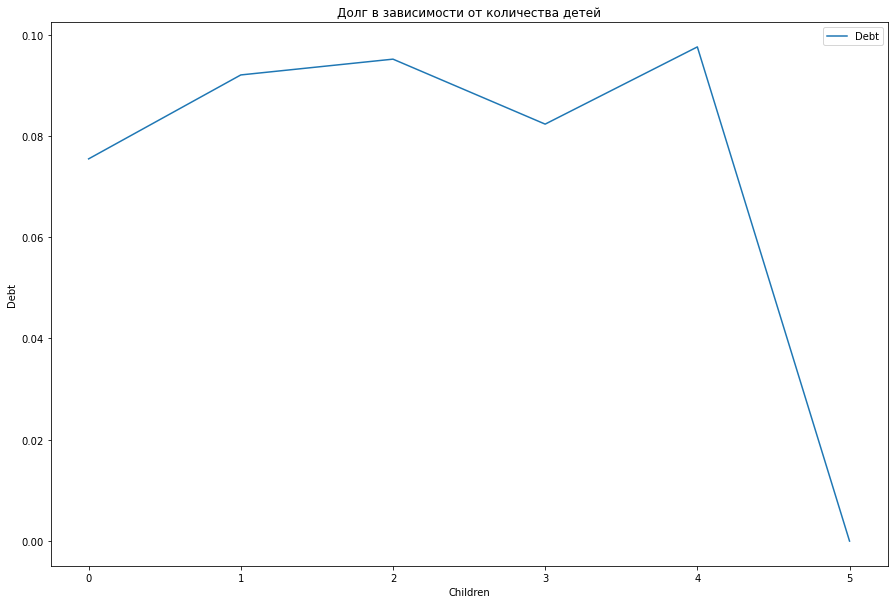

In [52]:
plt.figure(figsize=(15, 10))
plt.plot(df.pivot_table(values='debt', index='children'))
plt.title('Долг в зависимости от количества детей')
plt.legend(['Debt'])
plt.xlabel('Children')
plt.ylabel('Debt')
plt.show()

#### Вывод

Из проведенного анализа видно, что с увеличением количества детей увеличивается и процент невозвращенных кредитов. При этом необходимо отметить, что доля увеличивается несильно из чего можно сделать косвенный вывод, что заемщики с детьми более ответственные в части оплаты кредитных обязательств (хотя финансовая нагрузка у них, как правило, выше, чем у заемщиков без детей, кредитные обязательства они все равно покрывают в примерно таком же объеме, как и бездетные заемщики).

### Гипотеза 2: Существует ли зависимость между семейным положением и возвратом кредита в срок?

Исследуем вторую гипотезу: существует ли зависимость между семейным положением и возвратом кредита в срок?

Для этого сгруппируем данные по семейному статусу заемщиков и проанализируем доли, которые выплачивают заемщики по группам по отношению в общему количеству выборки.

In [39]:
df = df.merge(family_status_df, on='family_status_id')
df.head(10)

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category,family_status
0,1,8437.673028,42,0,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью,женат / замужем
1,1,4024.803754,36,1,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем,женат / замужем
2,0,5623.422610,33,1,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью,женат / замужем
3,3,4124.747207,32,1,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования,женат / замужем
4,0,2879.202052,43,0,0,F,компаньон,0,240525,операции с жильем,B,операции с недвижимостью,женат / замужем
5,0,152.779569,50,1,0,M,сотрудник,0,135823,образование,C,получение образования,женат / замужем
6,0,2188.756445,41,1,0,M,сотрудник,0,144425,покупка жилья для семьи,C,операции с недвижимостью,женат / замужем
7,2,4171.483647,36,0,0,M,компаньон,0,113943,покупка недвижимости,C,операции с недвижимостью,женат / замужем
8,0,792.701887,40,1,0,F,сотрудник,0,77069,покупка коммерческой недвижимости,C,операции с недвижимостью,женат / замужем
9,0,1846.641941,54,2,0,F,сотрудник,0,130458,приобретение автомобиля,C,операции с автомобилем,женат / замужем


In [40]:
# Построение сводной таблицы по долгам в зависимости от семейного статуса
df.pivot_table(values='debt', index='family_status')

,debt
family_status,
Не женат / не замужем,0.097842
в разводе,0.071247
вдовец / вдова,0.065539
гражданский брак,0.093142
женат / замужем,0.075575


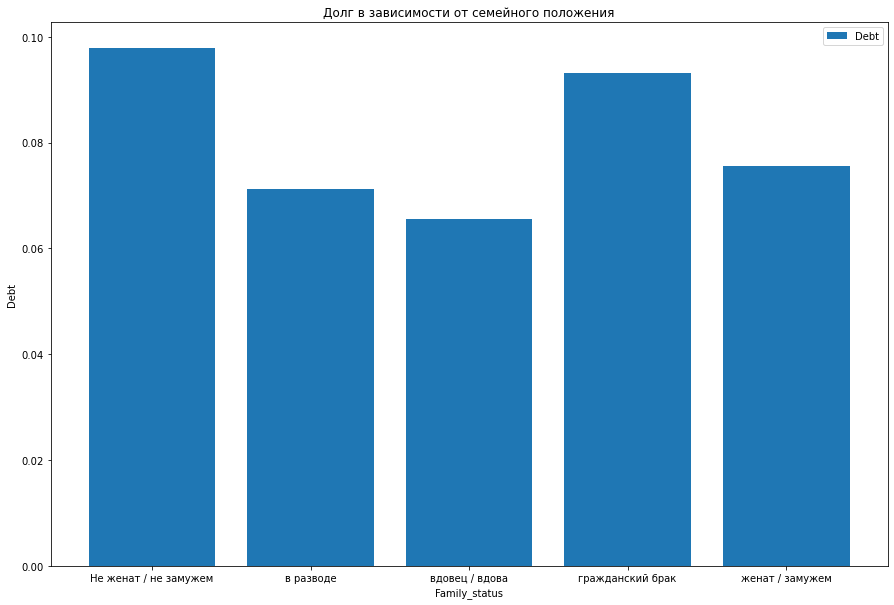

In [41]:
plt.figure(figsize=(15, 10))
plt.bar(df.pivot_table(values='debt', index='family_status').reset_index()['family_status'],
        df.pivot_table(values='debt', index='family_status')['debt'])
plt.title('Долг в зависимости от семейного положения')
plt.legend(['Debt'])
plt.xlabel('Family_status')
plt.ylabel('Debt')
plt.show()

#### Вывод

Из проведенного анализа видно, что заемщики, состоящие в разводе и вдовцы более исправно выполняют кредитные обязательства, чем другие категории заемщиков. Люди без семейного положения или живущие в гражанском браке выполняют свои кредитные обязательства хуже остальных категорий. Медианное значение в анализе приходится на женатых/замужних людей, чьи обязательства исполняются лучше людей без семейного положения и живущих в гражданском браке, но хуже людей, находящихся в разводе или потерявших свою вторую половину.

### Гипотеза 3: Существует ли зависимость между уровнем дохода и возвратом кредита в срок?

Исследуем третью гипотезу: существует ли зависимость между уровнем дохода и возвратом кредита в срок?

Для этого проанализируем категории заемщиков по уровню дохода (от категории A до E).

In [42]:
# Построение сводной таблицы по долгам в зависимости от уровня дохода
df.pivot_table(values='debt', index='total_income_category')

,debt
total_income_category,
A,0.080000
B,0.070784
C,0.084926
D,0.060519
E,0.090909


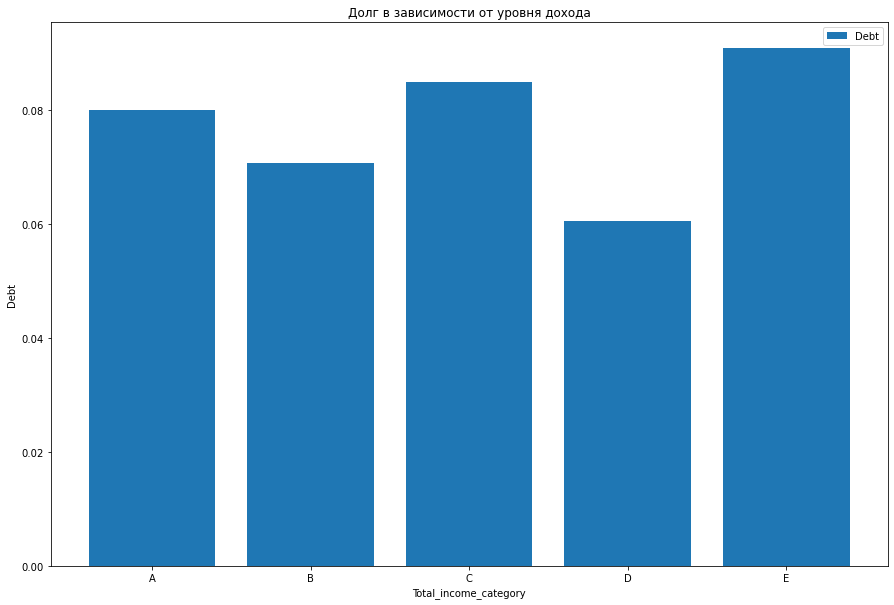

In [43]:
plt.figure(figsize=(15, 10))
plt.bar(df.pivot_table(values='debt', index='total_income_category')
          .reset_index()['total_income_category'],
        df.pivot_table(values='debt', index='total_income_category')['debt'])
plt.title('Долг в зависимости от уровня дохода')
plt.legend(['Debt'])
plt.xlabel('Total_income_category')
plt.ylabel('Debt')
plt.show()

#### Вывод

Из проведенного анализа видно, что наиболее платежеспособными оказались заемщики с уровнем дохода от 30 до 50 тыс. руб. Возможно, на этот показатель сказывается то, что такие заемщики не берут на себя большие обязательства.
Заемщики с уровнем дохода от 200 до 1000 тыс. руб. так же могут позволить себе оплачивать взятые на них обязательства.
Остальные категории заемщиков выполняют свои кредитные обязательства немного хуже.
Хуже всех выполняют свои обязательства заемщики с уровнем дохода от 0 до 30 тыс. руб. Возможно это связано с желанием обеспечить себе достойный уровень жизни, но неимением для этого должных финансовых ресурсов.

### Гипотеза 4: Как разные цели кредита влияют на его возврат в срок?

Исследуем четвертую гипотезу: как разные цели кредита влияют на его возврат в срок?

Для этого проанализируем цели, на которые выдавались кредиты.

In [44]:
# Построение сводной таблицы по долгам в зависимости от целей кредита
df.pivot_table(values='debt', index='purpose_category')

,debt
purpose_category,
операции с автомобилем,0.093236
операции с недвижимостью,0.072596
получение образования,0.092947
проведение свадьбы,0.078730


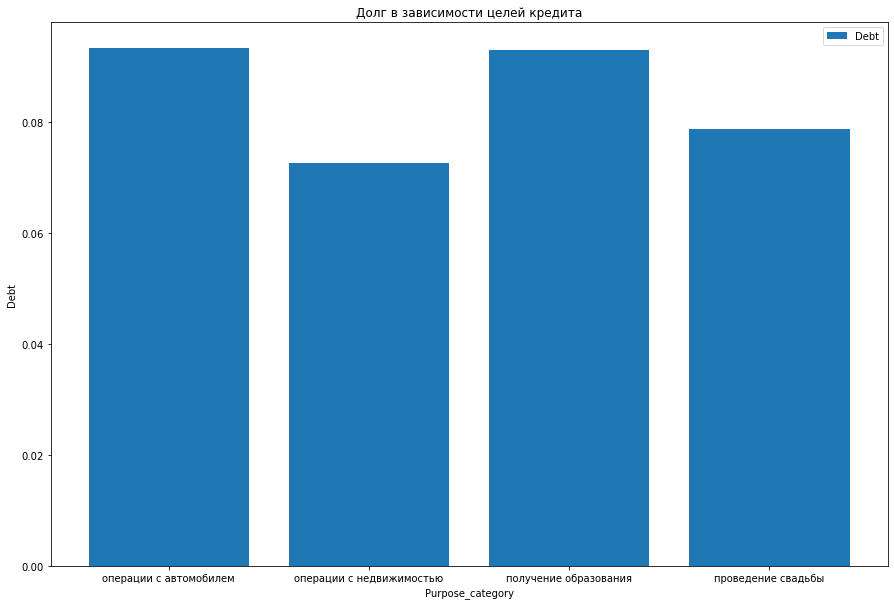

In [45]:
plt.figure(figsize=(15, 10))
plt.bar(df.pivot_table(values='debt', index='purpose_category').reset_index()['purpose_category'],
        df.pivot_table(values='debt', index='purpose_category')['debt'])
plt.title('Долг в зависимости целей кредита')
plt.legend(['Debt'])
plt.xlabel('Purpose_category')
plt.ylabel('Debt')
plt.show()

#### Вывод

Из проведенного анализа видно, что наиболее кредитные обязательства взятые на проведение операций с недвижимостью и свадебного мероприятия исполняются лучше, чем операции на покупку автомобиля или получение образования.
Возможно это связано с тем, что операции по недвижимостью являются для людей жизненно важной необходимостью, а новобрачные начинают жизнь с листого семейного листа и не желают его очернять (к тому же на свадьбе, как правило, молодоженам дарят деньги! Можно и кредит закрыть).
А вот покупка автомобиля, который требует к себе дополнительного внимания, ухода и финансовых вложений ложится сильным грузом на плечи заемщиков.
Деньги, взятые на получение образования возвращаются неохотно из-за того, что обучение для человека это всегда трудность, которую нужно преодолеть, а если обучение еще и не принесло своих плодов или не понравилось, то человек остается и без денег и без образования, которое хотел получить.

## Общий вывод:

Нами была рассмотрена выборка данных по платежеспособности клиентов банка, проведена их предобработка и анализ 4-х гипотез:
* Есть ли зависимость между количеством детей и возвратом кредита в срок?
* Есть ли зависимость между семейным положением и возвратом кредита в срок?
* Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
* Как разные цели кредита влияют на его возврат в срок?

На основе проведенного анализа можно сделать выводы, что на результат платежеспособности заещиков влияют такие показатели, как:
* количество детей - чем больше детей у заемщика, тем выше у него финансовая нагрузка и тем сложнее ему закрывать свои обязательства;
* семейный статус - одинокие люди чаще грустят и чаще себя балуют, из-за чего не всегда справляются со своими обязательствами.
* доход - люди с маленьким доходом хотят жить лучше и обеспечивают себе нормальный уровень жизни, но увы, за счет кредитов. А вот люди с большим доходом склонны брать кредиты для инвестиционной деятельности и бизнеса и тоже не всегда справляются со своими амбициями и обязательствами. Оптимальным заемщиком, исходя из анализа, является средний класс;
* цель, на которую берется займ - существуют жизненонеобходимые цели и цели, которые удовлетворяют наши амбиции или желания. Исходя из анализа жизненнонеобходимые цели, такие как покупка недвижимости или скрепление своей жизни узами брака заставляют заемщиков быть более ответственными.

Рекомендации кредитному отделу: при построении модели кредитного скоринга учитывать результаты проведенного анализа по платежеспособности заемщиков по категориям и целям кредитования.